In [1]:
import sys
sys.path.append('../')

### Libraries
from pipelines.experimental_modeling_pipeline import DiabetesPreprocessing as DP
from pipelines.experimental_modeling_pipeline import AsthmaPreprocessing as AP
from pipelines.experimental_modeling_pipeline import ClusteringAnalysis as QA
from pipelines.experimental_modeling_pipeline import Experimental_modeling_pipeline as EMP
from pipelines.experimental_modeling_pipeline import CopdPreprocessing as COPDP
from pipelines.experimental_modeling_pipeline import ObesityPreprocessing as OP
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats

dp = DP("C:/Users/keimp/")
ap = AP("C:/Users/keimp/")
copdp = COPDP("C:/Users/keimp/")
op = OP("C:/Users/keimp/")
emp = EMP()

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import SVMSMOTE
from sklearn.linear_model import LinearRegression
import scipy.stats as st 
import statsmodels.stats.api as sms

from statsmodels.stats.contingency_tables import mcnemar 
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

In [3]:
from Meta_learner.model import dataPreprocessing as Datapre
datapre = Datapre("C:/Users/keimp/")
datapre.factory()
df = datapre.df

DATAPREPROCESSING INITIALIZED
0/19
1/19
2/19
3/19
4/19
5/19
6/19
7/19
8/19


C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:398: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  mc['Diabetes diagnosed by doctor | Instance 0'] = mc['Diabetes diagnosed by doctor | Instance 0'].replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:399: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  mc['Diabetes diagnosed by doctor | Instance 0'] = mc['Diabetes diagnosed by doctor | Instance 0'].replace("Do not know", pd.np.nan)


9/19


C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:480: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  sleep = sleep.replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:481: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  sleep = sleep.replace("Do not know", pd.np.nan)


10/19
11/19
12/19
13/19
14/19


C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:505: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  smoking_data['Age started smoking in current smokers'] = smoking_data['Age started smoking in current smokers'].replace("Do not know", pd.np.nan)
C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:506: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  smoking_data['Age started smoking in current smokers'] = smoking_data['Age started smoking in current smokers'].replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:509: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  smoking_data['Age started smoking in former smokers'] 

15/19


C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:537: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  s = s.replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:538: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  s = s.replace("Do not know", pd.np.nan)
C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:579: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.na

Varible not convertable to datetime:  Date E11 first reported (non-insulin-dependent diabetes mellitus)    Code has event date matching participant's dat...
Date E14 first reported (unspecified diabetes mellitus)                                                     1998-11-01
Name: 225392, dtype: object
Varible not convertable to datetime:  Date E10 first reported (insulin-dependent diabetes mellitus)                                               2007-05-10
Date E11 first reported (non-insulin-dependent diabetes mellitus)    Code has event date matching participant's dat...
Date E14 first reported (unspecified diabetes mellitus)                                                     2005-02-06
Name: 318419, dtype: object
Varible not convertable to datetime:  Date E11 first reported (non-insulin-dependent diabetes mellitus)    Code has event date matching participant's dat...
Date E14 first reported (unspecified diabetes mellitus)                                                     1994-03-

C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:579: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


17/19


C:\Users\keimp\NHS\Code\experimental_modeling\CVD\..\Meta_learner\model.py:579: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


18/19
19/19 
DATAPREPROCESSING DONE


In [4]:
cvd = pd.read_csv("C:/Users/keimp/NHS/Data_files/supplementary_data/CVD_first_occurrences_with_labels_participant.csv", low_memory=False)
cvd_columns = cvd.columns.tolist()
cvd_columns.remove("Participant ID")
df['Date of attending assessment centre | Instance 0'] = pd.to_datetime(df['Date of attending assessment centre | Instance 0'])

for c in cvd_columns:
    cvd[c+"_binary"] = cvd[c].apply(datapre.nan_to_binary)

df = df.merge(cvd, on="Participant ID")
for c in cvd_columns:
    df[c] = df[c].replace("Code has event date matching participant's date of birth", pd.np.nan)
    df[c] = df[c].replace("Code has event date after participant's date of birth and falls in the same calendar year as date of birth", pd.np.nan)
    df[c] = pd.to_datetime(df[c])
    df[c+'diff_days'] = (df[c] - df['Date of attending assessment centre | Instance 0']) / np.timedelta64(1, 'D')

C:\Users\keimp\AppData\Local\Temp\ipykernel_32\1248918356.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df[c] = df[c].replace("Code has event date matching participant's date of birth", pd.np.nan)
C:\Users\keimp\AppData\Local\Temp\ipykernel_32\1248918356.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df[c] = df[c].replace("Code has event date after participant's date of birth and falls in the same calendar year as date of birth", pd.np.nan)


In [27]:
datacolumns_selected = [
    'Haemoglobin concentration | Instance 0',
 'Albumin | Instance 0',
 'Creatinine | Instance 0',
 'C-reactive protein | Instance 0',
 'Cholesterol | Instance 0',
 'HDL cholesterol | Instance 0',
 'LDL direct | Instance 0',
 'Glucose | Instance 0',
 'Triglycerides | Instance 0',
 'Vitamin D | Instance 0',
 'Glycated haemoglobin (HbA1c) | Instance 0',
 'Alanine aminotransferase | Instance 0',
 'Alkaline phosphatase | Instance 0',
 'Apolipoprotein A | Instance 0',
 'Apolipoprotein B | Instance 0',
 'Aspartate aminotransferase | Instance 0',
 'Calcium | Instance 0',
 'Direct bilirubin | Instance 0',
 'Gamma glutamyltransferase | Instance 0',
 'IGF-1 | Instance 0',
 'Lipoprotein A | Instance 0',
 #'Rheumatoid factor | Instance 0',
 'Phosphate | Instance 0',
'Age at recruitment',
 'Sex',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body mass index (BMI) | Instance 0',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Standing height | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
    'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Creatinine (enzymatic) in urine | Instance 0',
 'Microalbumin in urine | Instance 0',
 'Sodium in urine | Instance 0',
 'Potassium in urine | Instance 0',
'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0',
'Pack years of smoking',
 'Pack years adult smoking as proportion of life span exposed to smoking',
'Brisk pace',
 'Slow pace',
 'Steady average pace'
]
dis = [
    'Sex',
    'hypertension',
 'bronchitis',
 'hypothyroidism/myxoedema',
 'peritonitis',
 'duodenal ulcer',
 'heart attack/myocardial infarction',
 'diabetes',
 'high cholesterol',
 'gastro-oesophageal reflux (gord) / gastric reflux',
 'pneumonia',
 'fracture lower leg / ankle',
 'disc problem',
 'angina',
 'cystitis',
 'anxiety/panic attacks',
 'dyspepsia / indigestion',
 'asthma',
 'osteoarthritis',
 'kidney stone/ureter stone/bladder stone',
 'cholelithiasis/gall stones',
 'chronic fatigue syndrome',
 'chronic sinusitis',
 'hayfever/allergic rhinitis',
 'gout',
 'enlarged prostate',
 'chickenpox',
 'tuberculosis (tb)',
 'psoriasis',
 'back pain',
 'muscle or soft tissue injuries',
 'fracture metatarsal',
 'iron deficiency anaemia',
 'pulmonary embolism +/- dvt',
 'hiatus hernia',
 'migraine',
 'headaches (not migraine)',
 'heart valve problem/heart murmur',
 'multiple sclerosis',
 'spinal cord disorder',
 'prostate problem (not cancer)',
 'unclassifiable',
 'allergy or anaphylactic reaction to drug',
 'eye trauma',
 'head injury',
 'fracture skull / head',
 'optic neuritis',
 'urinary frequency / incontinence',
 'spine arthritis/spondylitis',
 'uterine fibroids',
 'depression',
 'pancreatitis',
 'glaucoma',
 'retinal detachment',
 'stomach disorder',
 'sciatica',
 'other renal/kidney problem',
 'ulcerative colitis',
 'deep venous thrombosis (dvt)',
 'allergy/hypersensitivity/anaphylaxis',
 'osteomyelitis',
 'fracture fibula',
 'fracture tibia',
 'inguinal hernia',
 'type 2 diabetes',
 'psoriatic arthropathy',
 'ear/vestibular disorder',
 'irritable bowel syndrome',
 'colitis/not crohns or ulcerative colitis',
 'myasthenia gravis {1260_1284}',
 'gestational diabetes',
 'emphysema/chronic bronchitis',
 'diverticular disease/diverticulitis',
 'hyperthyroidism/thyrotoxicosis',
 'malabsorption/coeliac disease',
 'arthritis (nos)',
 'stroke',
 'ankylosing spondylitis',
 'iritis',
 'measles / morbillivirus',
 'scarlet fever / scarlatina',
 'plantar fascitis',
 'cervical spondylosis',
 'cataract',
 'allergy or anaphylactic reaction to food',
 'osteoporosis',
 'prolapsed disc/slipped disc',
 'endometriosis',
 'oesophagitis/barretts oesophagus',
 'pleurisy',
 'urinary tract infection/kidney infection',
 'sleep apnoea',
 'cellulitis',
 'breast cysts',
 'vaginal prolapse/uterine prolapse',
 'back problem',
 'essential hypertension',
 'muscle/soft tissue problem',
 'crohns disease',
 'uterine polyps',
 'anaemia',
 'thyroid problem (not cancer)',
 'ovarian cyst or cysts',
 'subarachnoid haemorrhage',
 'fracture toe',
 'lichen planus',
 'chronic obstructive airways disease/copd',
 'oesophageal disorder',
 'other joint disorder',
 'heart arrhythmia',
 'eczema/dermatitis',
 'svt / supraventricular tachycardia',
 'menorrhagia (unknown cause)',
 'infective/viral hepatitis',
 'diabetic eye disease',
 'gall bladder disease',
 "raynaud's phenomenon/disease",
 'rheumatoid arthritis',
 'menopausal symptoms / menopause',
 'epilepsy',
 'eye infection',
 'fracture rib',
 'macular degeneration',
 'nasal/sinus disorder',
 'renal failure requiring dialysis',
 'irregular heart beat',
 'tinnitus / tiniitis',
 'joint pain',
 'ectopic pregnancy',
 'meningitis',
 'other neurological problem',
 'hepatitis',
 'tonsiltis',
 'peripheral nerve injury',
 'jaundice (unknown cause)',
 'bone disorder',
 'gestational hypertension/pre-eclampsia',
 'pleural plaques (not known asbestosis)',
 'liver/biliary/pancreas problem',
 "meniere's disease",
 'appendicitis',
 'benign breast lump',
 'fracture clavicle / collar bone',
 'retinal problem',
 'schistosomiasis/bilharzia',
 'hereditary/genetic haematological disorder',
 'dry eyes',
 'miscarriage',
 'mania/bipolar disorder/manic depression',
 'pituitary adenoma/tumour',
 'nasal polyps',
 'atrial fibrillation',
 'polymyalgia rheumatica',
 'ureteric obstruction/hydronephrosis',
 'gastric/stomach ulcers',
 'bph / benign prostatic hypertrophy',
 'abnormal smear (cervix)',
 'undescended testicle',
 'bladder problem (not cancer)',
 'transient ischaemic attack (tia)',
 'thalassaemia',
 'fracture forearm / wrist',
 'osteopenia',
 'peripheral neuropathy',
 'hepatitis a',
 'pneumothorax',
 'fracture sternum',
 'rosacea',
 'scleroderma/systemic sclerosis',
 'venous thromboembolic disease',
 'peripheral vascular disease',
 'trapped nerve/compressed nerve',
 'shingles',
 'umbilical hernia',
 'heart/cardiac problem',
 'other respiratory problems',
 'burns',
 'peripheral nerve disorder',
 'rectal or colon adenoma/polyps',
 'erectile dysfunction / impotence',
 'mumps / epidemic parotitis',
 'whooping cough / pertussis',
 'psychological/psychiatric problem',
 'cardiomyopathy',
 'neck problem/injury',
 'helicobacter pylori',
 'spinal injury',
 'cerebral aneurysm',
 'blistering/desquamating skin disorder',
 'spontaneous pneumothorax/recurrent pneumothorax',
 'blepharitis / eyelid infection',
 'eye/eyelid problem',
 'giant cell/temporal arteritis',
 'parkinsons disease',
 'other abdominal problem',
 'connective tissue disorder',
 'deliberate self-harm/suicide attempt',
 'infectious mononucleosis / glandular fever / epstein barr virus (ebv)',
 'fracture upper arm / humerus / elbow',
 'vasculitis',
 'acromegaly',
 'anorexia/bulimia/other eating disorder',
 'joint disorder',
 'female infertility',
 "dupuytren's contracture",
 'hyperparathyroidism',
 'stress',
 'retinal artery/vein occlusion',
 'sarcoidosis',
 'disc degeneration',
 'fracture foot',
 'otosclerosis',
 'gastrointestinal bleeding',
 'polycystic kidney',
 'alcohol dependency',
 'non-infective hepatitis',
 'allergy to house dust mite',
 'benign neuroma',
 'post-natal depression',
 'low platelets/platelet disorder',
 'varicose veins',
 'gynaecological disorder (not cancer)',
 'fracture wrist / colles fracture',
 'nervous breakdown',
 'myasthenia gravis {1437_1489}',
 'bursitis',
 'fracture jaw',
 'polycystic ovaries/polycystic ovarian syndrome',
 'fracture finger',
 'polycythaemia vera',
 'fracture patella / knee',
 'carpal tunnel syndrome',
 'femoral hernia',
 'polio / poliomyelitis',
 'testicular problems (not cancer)',
 'scrotal problem (not cancer)',
 'peptic ulcer',
 'acne/acne vulgaris',
 'fracture nose',
 'fibromyalgia',
 'rheumatic fever',
 'chronic skin ulcers',
 'bronchiectasis',
 'fracture neck of femur / hip',
 'type 1 diabetes',
 'urticaria',
 'soft tissue inflammation',
 'fracture neck / cervical fracture',
 'constipation',
 'asbestosis',
 'septicaemia / sepsis',
 'anal problem',
 'gastritis/gastric erosions',
 'herpes simplex',
 'systemic lupus erythematosis/sle',
 'liver failure/cirrhosis',
 'other substance abuse/dependency',
 'renal failure not requiring dialysis',
 'schizophrenia',
 'tennis elbow / lateral epicondylitis',
 'heart failure/pulmonary odema',
 'subdural haemorrhage/haematoma',
 'haemorrhoids / piles',
 'cerebral palsy',
 'dysmenorrhoea / dysmenorrhea',
 'rectal prolapse',
 'rubella / german measles',
 'cervical polyps',
 'anal fissure',
 'dermatopolymyositis',
 "bell's palsy/facial nerve palsy",
 'malaria',
 'breast fibroadenoma',
 'neurological injury/trauma',
 'fracture pelvis',
 'food intolerance',
 'prostatitis',
 'bowel / intestinal perforation',
 'leg claudication/ intermittent claudication',
 'ovarian problem',
 'essential thrombocytosis',
 'myelofibrosis',
 "adrenocortical insufficiency/addison's disease",
 "grave's disease",
 'meningioma / benign meningeal tumour',
 'trigemminal neuralgia',
 'inflammatory bowel disease',
 'thyroid goitre',
 'pernicious anaemia',
 'insomnia',
 'scoliosis',
 'brain haemorrhage',
 'varicose ulcer',
 'disorder or pituitary gland',
 'emphysema',
 'throat or larynx disorder',
 'vocal cord polyp',
 'cholecystitis',
 'tendonitis / tendinitis / tenosynovitis',
 'cervical intra-epithelial neoplasia (cin) / precancerous cells cervix',
 'phaeochromocytoma',
 'thyroid radioablation therapy',
 'post-traumatic stress disorder',
 'myositis/myopathy',
 'pemphigoid/pemphigus',
 'fracture radius',
 'fracture ulna',
 'allergy to elastoplast',
 'incisional hernia',
 'pulmonary fibrosis',
 'uterine problem',
 'haemophilia',
 'gastroenteritis/dysentry',
 'fibrosing alveolitis/unspecified alveolitis',
 'fibrocystic disease',
 'spinal stenosis',
 'paraplegia',
 'fracture hand',
 'fracture face / orbit / eye socket',
 'cranial nerve problem/palsy',
 'hiv/aids',
 'nephritis',
 'thyroiditis',
 'clotting disorder/excessive bleeding',
 'fracture thumb',
 'bowel / intestinal obstruction',
 'aortic aneurysm',
 'oesophageal stricture',
 'aplastic anaemia',
 'breast disease (not cancer)',
 'abdominal hernia',
 'pleural effusion',
 'lymphoedema',
 'renal/kidney failure',
 'bowel / intestinal infarction',
 'brain abscess/intracranial abscess',
 'fracture shoulder / scapula',
 'vertigo',
 'labyrinthitis',
 'fracture shaft of femur',
 'dementia/alzheimers/cognitive impairment',
 'empyema',
 'polyartertis nodosa',
 'alcoholic liver disease / alcoholic cirrhosis',
 'fracture vertebra / crush fracture / vertebral collapse',
 "bowen's disease",
 'vitiligo',
 'pericardial problem',
 'other demyelinating disease (not multiple sclerosis)',
 'opioid dependency',
 'pyelonephritis',
 'chronic/degenerative neurological problem',
 "sjogren's syndrome/sicca syndrome",
 'pericarditis',
 'respiratory infection',
 'neutropenia/lymphopenia',
 'alopecia / hair loss',
 'spinal abscess',
 'acute infective polyneuritis/guillain-barre syndrome',
 'encephalitis',
 'hepatitis c',
 'aortic aneurysm rupture',
 'sickle cell disease',
 'parathyroid gland problem (not cancer)',
 'aortic regurgitation / incompetence',
 'benign / essential tremor',
 'hypopituitarism',
 'hypertrophic cardiomyopathy (hcm / hocm)',
 'stevens johnson syndrome',
 'pelvic inflammatory disease/ pid',
 'pyloric stenosis',
 'aortic stenosis',
 'myocarditis',
 'haemochromatosis',
 'arterial embolism',
 'polymyositis',
 "housemaid's knee (prepatellar bursitis)",
 'wegners granulmatosis',
 'parathyroid hyperplasia/adenoma',
 'mitral stenosis',
 'myeloproliferative disorder',
 'lichen sclerosis',
 'primary biliary cirrhosis',
 'yellow fever',
 'typhoid fever',
 'other venous/lymphatic disease',
 'bile duct obstruction/ascending cholangitis',
 'atrial flutter',
 'interstitial lung disease',
 "paget's disease",
 'pancreatic disease',
 'aortic valve disease',
 'mitral valve disease',
 'diphtheria',
 'allergy to nickel',
 'hepatitis b',
 'mitral valve prolapse',
 'lung abscess',
 'diabetic neuropathy/ulcers',
 'contact dermatitis',
 'disorder of adrenal gland',
 'dengue fever',
 'chronic laryngitis',
 'kidney nephropathy',
 'varicella zoster virus',
 'obsessive compulsive disorder (ocd)',
 'spina bifida',
 'mitral regurgitation / incompetence',
 'adrenal tumour',
 'infection of nervous system',
 'mrsa / methicillin resistant staphylococcus aureus',
 'ischaemic stroke',
 'cushings syndrome',
 'hydatiform mole',
 'wolff parkinson white / wpw syndrome',
 'sclerosing cholangitis',
 'cervical problem',
 'oesophageal varicies',
 "hyperaldosteronism/conn's syndrome",
 'monoclonal gammopathy/not myeloma',
 'motor neurone disease',
 'iga nephropathy',
 'hyperprolactinaemia',
 'male infertility',
 'glomerulnephritis',
 'alpha-1 antitrypsin deficiency',
 'cervical erosion',
 'carcinoid syndrome/tumour',
 'sick sinus syndrome',
 'pericardial effusion',
 'giardia / giardiasis',
 'retinitis pigmentosa',
 'diabetes insipidus',
 'respiratory failure',
 'dermatomyositis',
 'antiphospholipid syndrome',
 'bile duct disease',
 'aortic dissection',
 'epicondylitis',
 'diabetic nephropathy',
 'pancytopenia',
 'chlamydia',
 'benign insulinoma',
 'synovitis',
 'microscopic polyarteritis',
 'hepatitis e',
]

Number of missing values: 
 Haemoglobin concentration | Instance 0            0
Albumin | Instance 0                              0
Creatinine | Instance 0                           0
C-reactive protein | Instance 0                   0
Cholesterol | Instance 0                          0
                                                 ..
benign insulinoma                                 0
synovitis                                         0
microscopic polyarteritis                         0
hepatitis e                                       0
Date I50 first reported (heart failure)_binary    0
Length: 516, dtype: int64
Dataframe dimensions:  (564, 516)


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

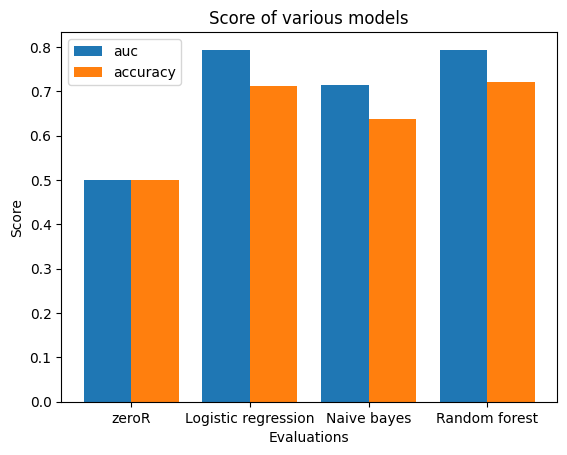

F1:  0.7077879520698289 0.5765687456932158 0.7157910794608042
auc:  [0.5, 0.7931916845685643, 0.7133190118152525, 0.7939301378446115]
accuracy:  [0.5, 0.7128792667509481, 0.6383059418457648, 0.7216656131479141]
FEATURE IMPORTANCE


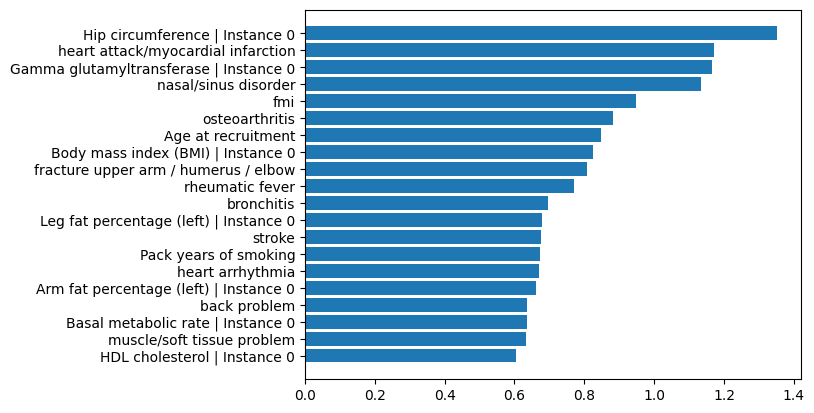

In [28]:
tdf = df.dropna(subset=datacolumns_selected+dis+['Date I50 first reported (heart failure)_binary'])
l = tdf[(tdf['Date I50 first reported (heart failure)_binary']==1) & 
(tdf['Date I50 first reported (heart failure)diff_days'] > 0) &
(tdf['Date I50 first reported (heart failure)diff_days'] < 5*365)]
h = tdf[tdf['Date I50 first reported (heart failure)_binary']==0]
cohort = pd.concat([l,h.sample(n=l.shape[0])])
cohort = cohort[datacolumns_selected+dis+['Date I50 first reported (heart failure)_binary']]
if cohort.shape[0] > 100:
    emp.pipeline(cohort,'Date I50 first reported (heart failure)_binary',datacolumns_selected+dis, 0.25, splits= 5)

    print("FEATURE IMPORTANCE")
    X = cohort[datacolumns_selected+dis]
    y = cohort['Date I50 first reported (heart failure)_binary']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    coefficients = model.coef_[0]
    
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    feature_importance = feature_importance.iloc[feature_importance.shape[0]-20:feature_importance.shape[0]]
    plt.barh(y=feature_importance.Feature, width=feature_importance.Importance)
    plt.show()

    predictions = model.predict(X_test)

Number of missing values: 
 Haemoglobin concentration | Instance 0                              0
Albumin | Instance 0                                                0
Creatinine | Instance 0                                             0
C-reactive protein | Instance 0                                     0
Cholesterol | Instance 0                                            0
                                                                   ..
benign insulinoma                                                   0
synovitis                                                           0
microscopic polyarteritis                                           0
hepatitis e                                                         0
Date I25 first reported (chronic ischaemic heart disease)_binary    0
Length: 516, dtype: int64
Dataframe dimensions:  (1780, 516)


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

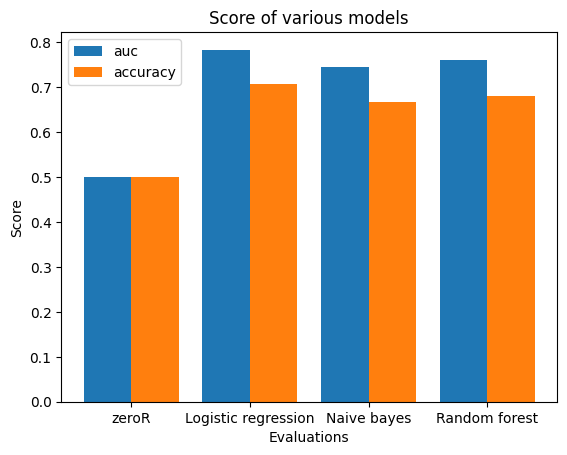

F1:  0.7003546511732186 0.60188232056878 0.6803946867452642
auc:  [0.5, 0.7836384294912259, 0.7452846862769852, 0.7612927660648907]
accuracy:  [0.5, 0.7078651685393258, 0.6679775280898876, 0.6803370786516855]
FEATURE IMPORTANCE


c:\users\keimp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


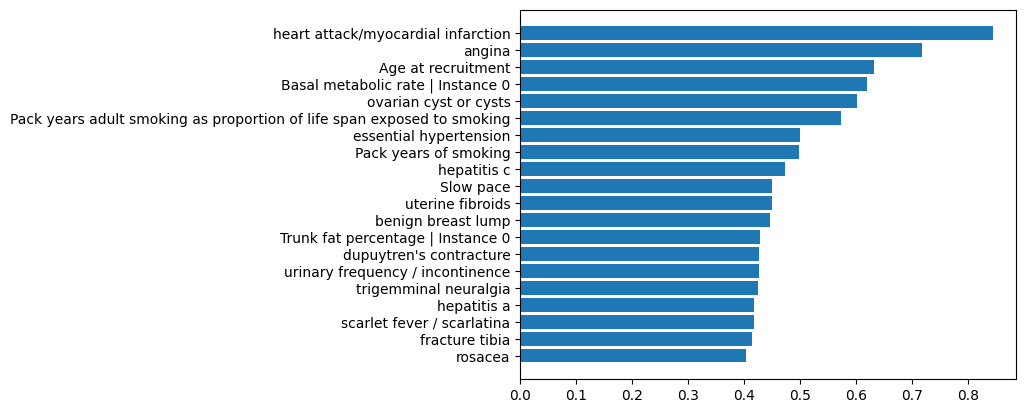

In [45]:
tdf = df.dropna(subset=datacolumns_selected+dis+['Date I25 first reported (chronic ischaemic heart disease)_binary'])
l = tdf[(tdf['Date I25 first reported (chronic ischaemic heart disease)_binary']==1) & 
(tdf['Date I25 first reported (chronic ischaemic heart disease)diff_days'] > 0) &
(tdf['Date I25 first reported (chronic ischaemic heart disease)diff_days'] < 5*365)]
h = tdf[tdf['Date I25 first reported (chronic ischaemic heart disease)_binary']==0]
cohort = pd.concat([l,h.sample(n=l.shape[0])])
cohort = cohort[datacolumns_selected+dis+['Date I25 first reported (chronic ischaemic heart disease)_binary']]
if cohort.shape[0] > 100:
    emp.pipeline(cohort,'Date I25 first reported (chronic ischaemic heart disease)_binary',datacolumns_selected+dis, 0.25, splits= 5)

    print("FEATURE IMPORTANCE")
    X = cohort[datacolumns_selected+dis]
    y = cohort['Date I25 first reported (chronic ischaemic heart disease)_binary']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    coefficients = model.coef_[0]
    
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    feature_importance = feature_importance.iloc[feature_importance.shape[0]-20:feature_importance.shape[0]]
    plt.barh(y=feature_importance.Feature, width=feature_importance.Importance)
    plt.show()

    predictions = model.predict(X_test)

## TEN

In [41]:
ten_hf = ['Hip circumference | Instance 0',
         'heart attack/myocardial infarction',
         'bronchitis',#This one is replaced!
         'nasal/sinus disorder',
         'fmi',
         'osteoarthritis',
         'Age at recruitment',
         'Body mass index (BMI) | Instance 0',
         'fracture upper arm / humerus / elbow',
         'rheumatic fever']

Number of missing values: 
 Hip circumference | Instance 0                    0
heart attack/myocardial infarction                0
bronchitis                                        0
nasal/sinus disorder                              0
fmi                                               0
osteoarthritis                                    0
Age at recruitment                                0
Body mass index (BMI) | Instance 0                0
fracture upper arm / humerus / elbow              0
rheumatic fever                                   0
Date I50 first reported (heart failure)_binary    0
dtype: int64
Dataframe dimensions:  (6544, 11)


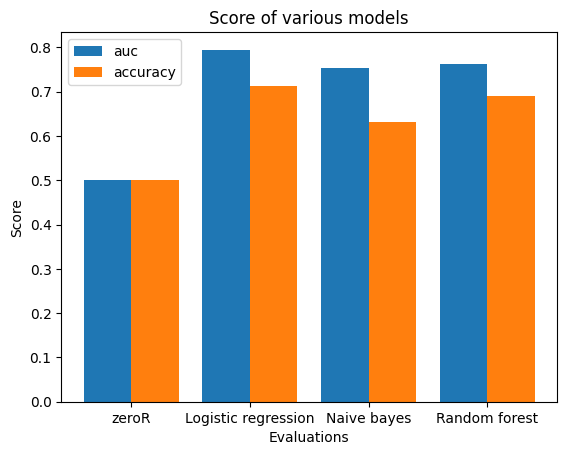

F1:  0.7133661215143117 0.4759339130493157 0.6869301243473704
auc:  [0.5, 0.7947002366341538, 0.7544905034010225, 0.7627424964656937]
accuracy:  [0.5, 0.7121050922454053, 0.6309596232154246, 0.6911698123786629]
FEATURE IMPORTANCE


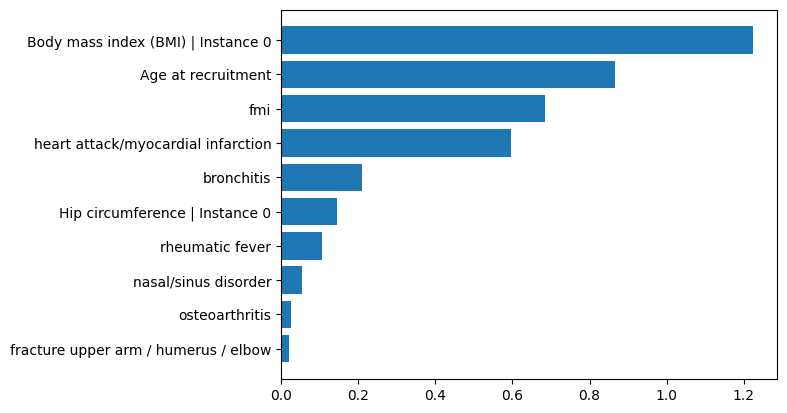

In [42]:
tdf = df.dropna(subset=ten_hf+['Date I50 first reported (heart failure)_binary'])
l = tdf[(tdf['Date I50 first reported (heart failure)_binary']==1) & 
(tdf['Date I50 first reported (heart failure)diff_days'] > 0) &
(tdf['Date I50 first reported (heart failure)diff_days'] < 5*365)]
h = tdf[tdf['Date I50 first reported (heart failure)_binary']==0]
cohort = pd.concat([l,h.sample(n=l.shape[0])])
cohort = cohort[ten_hf+['Date I50 first reported (heart failure)_binary']]
if cohort.shape[0] > 100:
    emp.pipeline(cohort,'Date I50 first reported (heart failure)_binary',ten_hf, 0.25, splits= 5)

    print("FEATURE IMPORTANCE")
    X = cohort[ten_hf]
    y = cohort['Date I50 first reported (heart failure)_binary']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    coefficients = model.coef_[0]
    
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    feature_importance = feature_importance.iloc[feature_importance.shape[0]-20:feature_importance.shape[0]]
    plt.barh(y=feature_importance.Feature, width=feature_importance.Importance)
    plt.show()

    predictions = model.predict(X_test)
    

In [53]:
ten_isch = [
    "heart attack/myocardial infarction",
    "angina",
    "Age at recruitment",
    "Basal metabolic rate | Instance 0",
    "ovarian cyst or cysts",
    "Pack years adult smoking as proportion of life span exposed to smoking",
    "essential hypertension",
    "Pack years of smoking",
    "Slow pace",
    "hepatitis c"
]

Number of missing values: 
 heart attack/myocardial infarction                                        0
angina                                                                    0
Age at recruitment                                                        0
Basal metabolic rate | Instance 0                                         0
ovarian cyst or cysts                                                     0
Pack years adult smoking as proportion of life span exposed to smoking    0
essential hypertension                                                    0
Pack years of smoking                                                     0
Slow pace                                                                 0
hepatitis c                                                               0
Date I25 first reported (chronic ischaemic heart disease)_binary          0
dtype: int64
Dataframe dimensions:  (10452, 11)


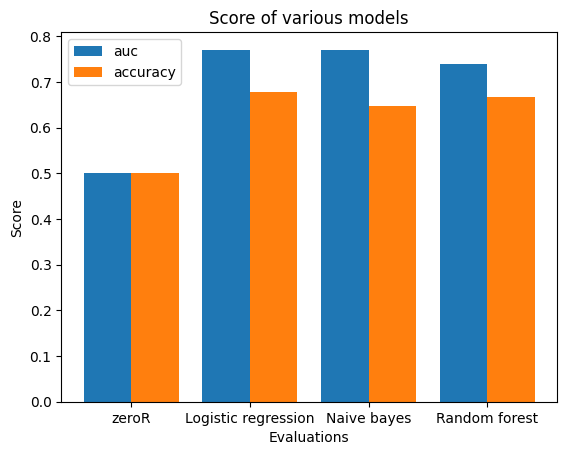

F1:  0.6162534325464721 0.5005377360056089 0.6632083748724056
auc:  [0.5, 0.7709411971365667, 0.7709900241902411, 0.7404383541496289]
accuracy:  [0.5, 0.6785304071447694, 0.6477220898862521, 0.6680050981765095]
FEATURE IMPORTANCE


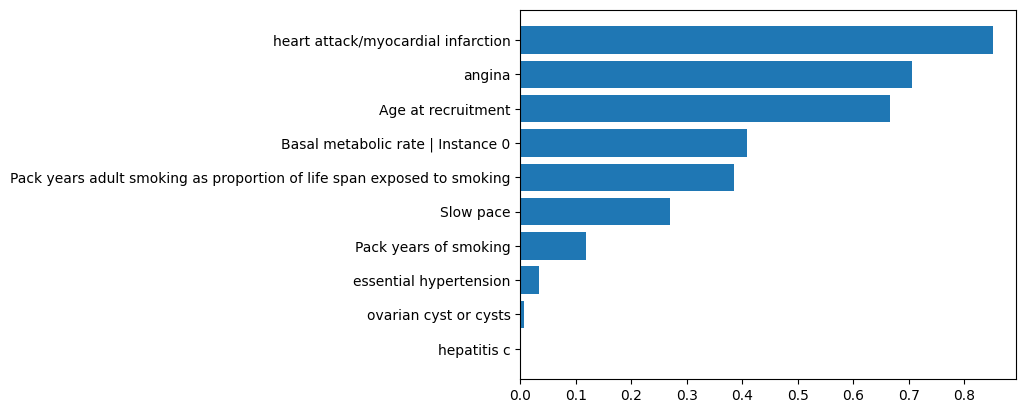

In [55]:
tdf = df.dropna(subset=ten_isch+['Date I25 first reported (chronic ischaemic heart disease)_binary'])
l = tdf[(tdf['Date I25 first reported (chronic ischaemic heart disease)_binary']==1) & 
(tdf['Date I25 first reported (chronic ischaemic heart disease)diff_days'] > 0) &
(tdf['Date I25 first reported (chronic ischaemic heart disease)diff_days'] < 5*365)]
h = tdf[tdf['Date I25 first reported (chronic ischaemic heart disease)_binary']==0]
cohort = pd.concat([l,h.sample(n=l.shape[0])])
cohort = cohort[ten_isch+['Date I25 first reported (chronic ischaemic heart disease)_binary']]
if cohort.shape[0] > 100:
    emp.pipeline(cohort,'Date I25 first reported (chronic ischaemic heart disease)_binary',ten_isch, 0.25, splits= 5)

    print("FEATURE IMPORTANCE")
    X = cohort[ten_isch]
    y = cohort['Date I25 first reported (chronic ischaemic heart disease)_binary']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    coefficients = model.coef_[0]
    
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
    feature_importance = feature_importance.sort_values('Importance', ascending=True)
    feature_importance = feature_importance.iloc[feature_importance.shape[0]-20:feature_importance.shape[0]]
    plt.barh(y=feature_importance.Feature, width=feature_importance.Importance)
    plt.show()

    predictions = model.predict(X_test)

In [5]:
df.columns.tolist()

['Participant ID',
 'Haemoglobin concentration | Instance 0',
 'Albumin | Instance 0',
 'Creatinine | Instance 0',
 'C-reactive protein | Instance 0',
 'Cholesterol | Instance 0',
 'HDL cholesterol | Instance 0',
 'LDL direct | Instance 0',
 'Glucose | Instance 0',
 'Triglycerides | Instance 0',
 'Vitamin D | Instance 0',
 'Glycated haemoglobin (HbA1c) | Instance 0',
 'Alanine aminotransferase | Instance 0',
 'Alkaline phosphatase | Instance 0',
 'Apolipoprotein A | Instance 0',
 'Apolipoprotein B | Instance 0',
 'Aspartate aminotransferase | Instance 0',
 'Calcium | Instance 0',
 'Direct bilirubin | Instance 0',
 'Gamma glutamyltransferase | Instance 0',
 'IGF-1 | Instance 0',
 'Lipoprotein A | Instance 0',
 'Rheumatoid factor | Instance 0',
 'Phosphate | Instance 0',
 'trigl_hdl_ratio',
 'apob_apoa_ratio',
 'Age at recruitment',
 'Sex',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequ

In [7]:
import re

In [52]:
for i in df.columns.tolist():
    if re.search("tit", i):
        print(i)

cystitis
pancreatitis
eczema/dermatitis
infective/viral hepatitis
hepatitis
hepatitis a
mumps / epidemic parotitis
non-infective hepatitis
prostatitis
cholecystitis
hepatitis c
interstitial lung disease
hepatitis b
contact dermatitis
alpha-1 antitrypsin deficiency
hepatitis e
